In [1]:
# https://www.kaggle.com/a03102030/plant-pathology-2020-resnet50
#384
# 資料處理套件
import os
import cv2
import csv
import random
import time
import numpy as np
import pandas as pd
import matplotlib.image as mpimg # mpimg 用於讀取圖片
import matplotlib.pyplot as plt # plt 用於顯示圖片
import seaborn as sns

In [2]:
# 設定顯示中文字體
from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 

In [3]:
#指定GPU
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

In [4]:
# Keras深度學習模組套件
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.optimizers import RMSprop
from keras.models import Sequential
from keras import utils as np_utils
from keras import backend as K
from keras import optimizers

Using TensorFlow backend.


In [5]:
# tensorflow深度學習模組套件
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf

#遷移式學習import
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.applications.vgg19 import VGG19
#B7
import efficientnet.tfkeras as efn
import tensorflow.keras.layers as L


from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint

In [6]:
print(pd.__version__)
print(tf.__version__)

1.0.5
2.0.0


In [7]:
# 讀取資料集標籤檔
Sample_label = pd.read_csv("C:/Users/danie/AOI_test/train01.csv",encoding="utf8")
# 顯示資料集標籤檔
Sample_label.head()

,train_00000.png,0
0,train_00001.png,1
1,train_00002.png,1
2,train_00003.png,5
3,train_00004.png,5
4,train_00005.png,5


In [8]:
# 串接圖片檔的路徑
Sample_pics_path = os.path.join("C:/Users/danie/AOI_test/train_images")
# 讀取路徑中的圖片
train_mango_fnames = os.listdir(Sample_pics_path)

In [9]:
#測試圖片
print(train_mango_fnames[0])
print(train_mango_fnames[1])
print(train_mango_fnames[2])

train_00000.png
train_00001.png
train_00002.png


In [10]:
# 讀取圖檔
img = mpimg.imread("C:/Users/danie/AOI_test/train_images/train_00001.png")
# 查看資料型態
print(type(img))
# 顯示圖片的比例
print(img.shape)

<class 'numpy.ndarray'>
(512, 512)


In [11]:
# 把圖片的比例壓縮至800x800 
res = cv2.resize(img,(800,800),interpolation=cv2.INTER_LINEAR)
# 顯示壓縮後圖片的比例
res.shape

(800, 800)

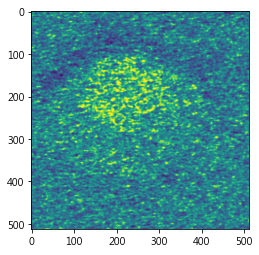

In [12]:
# 顯示原圖的芒果照片
plt.imshow(img)
plt.axis('on')
plt.show()

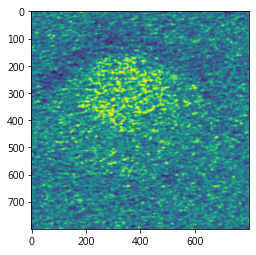

In [13]:
# 顯示壓縮過原圖的芒果照片
plt.imshow(res)
plt.axis('on')
plt.show()

In [14]:
# 製作標籤&資料集
csvfile = open('C:/Users/danie/AOI_test/train01.csv')
reader = csv.reader(csvfile)

In [15]:
# 讀取csv標籤
labels = []
for line in reader:
    tmp = [line[0],line[1]]
    # print tmp
    labels.append(tmp)

csvfile.close() 

In [16]:
picnum = len(labels)
print("AOI圖片數量:",picnum)

AOI圖片數量: 2528


In [17]:
labels[8]

['train_00008.png', '3']

In [18]:
X = []
y = []

In [19]:
# 轉換圖片的標籤
for i in range(len(labels)):
    labels[i][1] = labels[i][1].replace("0","0")
    labels[i][1] = labels[i][1].replace("1","1")
    labels[i][1] = labels[i][1].replace("2","2")
#測試是否有傳換成功
print(labels[8])

['train_00008.png', '3']


In [20]:
# # 隨機讀取圖片
# a = 0
# items= []
# import random
# for a in range(0,45000):
#     items.append(a)
    
a = 0
items= []
for a in range(0,2528):
    items.append(a)
print(items[0])
print(labels[0])

0
['train_00000.png', '0']


In [21]:
# # 製作訓練用資料集及標籤
# for i in random.sample(items,45000):
#     img = cv2.imread("C:/Users/danie/mango/C1-P2_Train Dev/Crop_Train/" + labels[i][0] )
#     res = cv2.resize(img,(224,224),interpolation=cv2.INTER_LINEAR)
#     res = img_to_array(res)
#     X.append(res)    
#     y.append(labels[i][1])
# print("done")

# 製作訓練用資料集及標籤
for i in items:
    img = cv2.imread("C:/Users/danie/AOI_test/train_images/" + labels[i][0])
    res = cv2.resize(img,(512,512),interpolation=cv2.INTER_LINEAR)
    res = img_to_array(res)
    X.append(res)
    y.append(labels[i][1])
print("done")

done


In [22]:
y_label_org = y

In [23]:
img[0]

array([[200, 200, 200],
       [200, 200, 200],
       [200, 200, 200],
       ...,
       [178, 178, 178],
       [178, 178, 178],
       [178, 178, 178]], dtype=uint8)

In [24]:
print(len(X))
print(len(y))

2528
2528


In [25]:
# 轉換至array的格式
X = np.array(X)
y = np.array(y)
print(y)
print(type(y))

['0' '1' '1' ... '3' '0' '5']
<class 'numpy.ndarray'>


In [26]:
# 轉換至float的格式
for i in range(len(X)):
    X[i] = X[i].astype('float32')

In [27]:
# 打映圖片訓練集的概況
# print(X[0])
print(type(X))
print(X.shape)

print(X[0].shape)
print(type(X[0]))

<class 'numpy.ndarray'>
(2528, 512, 512, 3)
(512, 512, 3)
<class 'numpy.ndarray'>


In [28]:
# 將標籤轉換至float格式
#y = tf.strings.to_number(y, out_type=tf.float32)
for i in range(len(y)):
    y[i] = y[i].astype('float32')
print(y)

['0' '1' '1' ... '3' '0' '5']


In [29]:
# 打映圖片標籤的概況
print(y[0])
print(type(y[0]))

0
<class 'numpy.str_'>


In [30]:
# 標籤進行one-hotencoding
y = np_utils.to_categorical(y, num_classes = 6)

In [31]:
y[0]

array([1., 0., 0., 0., 0., 0.], dtype=float32)

In [32]:
x_train = X[:1770]
y_train = y[:1770]
x_val = X[1770:]
y_val = y[1770:]

In [33]:
y_train_label = [0.,0.,0.,0.,0.,0.]

for i in range(0,len(y_train)):
    y_train_label = y_train[i] + y_train_label

In [34]:
y_train_label

array([470., 348.,  69., 260., 168., 455.])

In [35]:
print(type(x_train))
print(len(x_train))
print(x_train.shape)
print(type(x_train[0]))

<class 'numpy.ndarray'>
1770
(1770, 512, 512, 3)
<class 'numpy.ndarray'>


In [36]:
# #Use the VGG19 model 
# image_input = Input(shape=(224, 224, 3))
# ###  CODE HERE ###  (≈ 1 lines)
# vgg_model = VGG19(input_tensor=image_input, include_top=True, weights='imagenet')
# vgg_model.summary()

#EB7 model
model_finetuned = tf.keras.Sequential([efn.EfficientNetB1(input_shape=(512, 512, 3),
                                                weights='imagenet',
                                                #weights='noisy-student',
                                                include_top=False),
                                       L.GlobalAveragePooling2D(),
                                       L.Dense(6,activation='softmax')])
model_finetuned.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['categorical_accuracy'])
model_finetuned.summary()

# model_finetuned = ResNet50(include_top=False, weights='imagenet', input_shape=(384,384,3))
# x = model_finetuned.output
# x = GlobalAveragePooling2D()(x)
# x = Dense(128, activation="relu")(x)
# x = Dense(64, activation="relu")(x)
# predictions = Dense(3, activation="softmax")(x)
# model_finetuned = Model(inputs=model_finetuned.input, outputs=predictions)
# model_finetuned.compile(optimizer='adam',
#                   loss = 'categorical_crossentropy',
#                   metrics=['accuracy'])
# model_finetuned.summary()

27164672/27164032 [==============================] - 17s 1us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b1 (Model)      (None, 16, 16, 1280)      6575232   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 7686      
Total params: 6,582,918
Trainable params: 6,520,870
Non-trainable params: 62,048
_________________________________________________________________


In [37]:
#adam = optimizers.adam(lr=5)
#model.compile(optimizer='adam',
#              loss=tf.keras.losses.CategoricalCrossentropy(),
#              metrics=['acc'])

# model.compile(optimizer='rmsprop',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [38]:
# zca_whitening 對輸入數據施加ZCA白化
# rotation_range 數據提升時圖片隨機轉動的角度
# width_shift_range 圖片寬度的某個比例，數據提升時圖片水平偏移的幅度
# shear_range 剪切強度（逆時針方向的剪切變換角度）
# zoom_range 隨機縮放的幅度
# horizontal_flip 進行隨機水平翻轉
# fill_mode ‘constant’，‘nearest’，‘reflect’或‘wrap’之一，當進行變換時超出邊界的點將根據本參數給定的方法進行處理

datagen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=.1,
    fill_mode='nearest',
    shear_range=0.1,
    rescale=1/255,
    brightness_range=[0.5, 1.5])



# datagen = ImageDataGenerator(
#     zca_whitening=False,
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest',
#     rescale=1/255, #多加的
#     brightness_range=[0.5, 1.5]
#     )



In [39]:
# 導入圖像增強參數
datagen.fit(x_train)
x_train = x_train/255
x_val = x_val/255
print('rescale！done!')

rescale！done!


In [40]:
# 設定超參數HyperParameters 
batch_size =  8
epochs = 20

In [41]:
file_name = str(epochs)+'_'+str(batch_size)

In [42]:
# 學習速率調整
# LR_START = 0.00001
# LR_MAX = 0.0001 * 8
# LR_MIN = 0.00001
# LR_RAMPUP_EPOCHS = 10
# LR_SUSTAIN_EPOCHS = 2
# LR_EXP_DECAY = .8

# def lrfn(epoch):
#     if epoch < LR_RAMPUP_EPOCHS:
#         lr = (LR_MAX - LR_START) / LR_RAMPUP_EPOCHS * epoch + LR_START
#     elif epoch < LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:
#         lr = LR_MAX
#     else:
#         lr = (LR_MAX - LR_MIN) * LR_EXP_DECAY**(epoch - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS) + LR_MIN
#     return lr

In [43]:
# 加入EarlyStopping以及Tensorboard等回調函數
# CB = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
# TB = keras.callbacks.TensorBoard(log_dir='./log'+"_"+file_name, histogram_freq=1)

#reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
#                               patience=10, min_lr=0.001)
# EB7
# lrfn = build_lrfn()
#STEPS_PER_EPOCH = y_train.shape[0] // batch_size
# lr_schedule = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=1)
# reduce_lr =  ReduceLROnPlateau(monitor = "val_loss", factor = 0.5, patience = 10,
#   verbose = 0, mode = "auto", epsilon = 1e-04, cooldown = 0,
#   min_lr = 1e-5)
# es = EarlyStopping(monitor = "val_loss" , verbose = 1 , mode = 'min' , patience = 50 )
# mc = ModelCheckpoint('best_model.h5', monitor = 'loss' , mode = 'min', verbose = 1 , save_best_only = True)

#lr_callback = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=True)

# 小更動使用
#bestckpt_filepath = 'C:/Users/danie/mango/C1-P2_Train Dev/modelsave_ckpt/New_Mangotest_crop_and_B5_3/efnetB5forMango.best.hdf5'
allckpt_filepath="C:/Users/danie/AOI_test/Model_H5/AOI_efficientB1_fortest_P1/weights-improvement-{epoch:02d}-{val_categorical_accuracy:.2f}.hdf5"
RLR = ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.3,patience=2, min_lr = 1e-5)
ckptforall = ModelCheckpoint(allckpt_filepath, monitor='categorical_accuracy', verbose=1, save_best_only=True, mode='max')
#ckptforbest = ModelCheckpoint(bestckpt_filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [44]:
history = model_finetuned.fit(
    x = x_train , y = y_train,                                    
    #steps_per_epoch=100,
    batch_size = batch_size,
    epochs = epochs,
    validation_data=(x_val, y_val),
    #validation_steps=100,
    verbose=1,
    callbacks=[RLR, ckptforall],
    use_multiprocessing=False,
    shuffle=True
    )

Train on 1770 samples, validate on 758 samples
Epoch 1/20
1768/1770 [============================>.] - ETA: 0s - loss: 0.5458 - categorical_accuracy: 0.8269
Epoch 00001: categorical_accuracy improved from -inf to 0.82599, saving model to C:/Users/danie/AOI_test/Model_H5/AOI_efficientB1_fortest_P1/weights-improvement-01-0.37.hdf5
1770/1770 [==============================] - 256s 145ms/sample - loss: 0.5473 - categorical_accuracy: 0.8260 - val_loss: 1.6901 - val_categorical_accuracy: 0.3734
Epoch 2/20
1768/1770 [============================>.] - ETA: 0s - loss: 0.2898 - categorical_accuracy: 0.9067
Epoch 00002: categorical_accuracy improved from 0.82599 to 0.90678, saving model to C:/Users/danie/AOI_test/Model_H5/AOI_efficientB1_fortest_P1/weights-improvement-02-0.79.hdf5
1770/1770 [==============================] - 229s 129ms/sample - loss: 0.2895 - categorical_accuracy: 0.9068 - val_loss: 0.6847 - val_categorical_accuracy: 0.7902
Epoch 3/20
1768/1770 [============================>.] - 

In [45]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

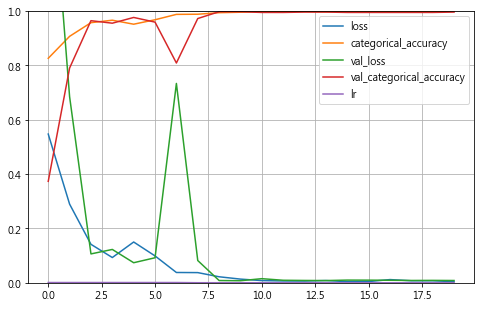

In [46]:
plot_learning_curves(history)

In [47]:
# 推測圖片
test_mango_dir = os.path.join("C:/Users/danie/AOI_test/train_images/")
test_mango_fnames = os.listdir(test_mango_dir)

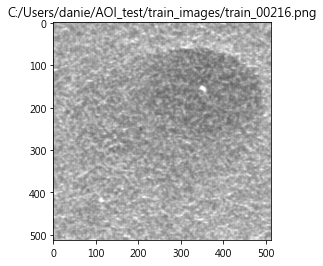

In [48]:
img_files = [os.path.join(test_mango_dir,f) for f in test_mango_fnames]
img_path = random.choice(img_files)

# 讀入待測試圖像並秀出
img = load_img(img_path, target_size=(512, 512))  # this is a PIL image
plt.title(img_path)
plt.grid(False)
plt.imshow(img)

In [49]:
labels = ['0','1',"2",'3','4','5']

In [50]:
# 將圖像轉成模型可分析格式(800x800x3, float32)
x = img_to_array(img)  # Numpy array with shape (800, 800, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 800, 800, 3)
x /= 255 # Rescale by 1/255

start = time.time() # 啟動計時器
result = model_finetuned.predict(x) # 對輸入圖像進行推論(預測)
finish = time.time() # 結束計時器

pred = result.argmax(axis=1)[0]
pred_prob = result[0][pred]

print("Result = %f" %pred_prob) # 印出結果可能機率值(0.0 ~ 1.0)
print("Test time :%f second." %(finish-start)) # 印出推論時間

# 設定分類門檻值並印出推論結果
print("有 {:.2f}% 機率為{}".format(pred_prob * 100,labels[pred])) # 印出推論時間

Result = 0.999694
Test time :3.720312 second.
有 99.97% 機率為1


In [51]:
# 測試集標籤預測
y_pred = model_finetuned.predict(x_val)

In [52]:
# 整體準確度
count = 0
for i in range(len(y_pred)):
    if(np.argmax(y_pred[i]) == np.argmax(y_val[i])): #argmax函数找到最大值的索引，即为其类别
        count += 1
score = count/len(y_pred)
print('正确率为:%.2f%s' % (score*100,'%'))

正确率为:99.60%


In [53]:
# 模型預測後的標籤
predict_label = np.argmax(y_pred,axis=1)
print(predict_label)
print(len(predict_label))

[0 0 4 0 3 1 5 0 1 3 0 1 5 0 5 5 5 1 4 3 1 1 0 5 5 4 4 0 0 3 3 4 2 1 1 1 0
 0 2 4 0 0 0 0 1 0 3 1 1 1 5 1 0 0 0 5 4 5 3 1 3 1 1 1 3 0 3 3 5 3 0 0 0 5
 2 3 5 5 5 5 5 5 0 5 3 2 3 0 1 0 0 0 4 0 0 5 5 0 5 0 2 0 0 3 1 3 4 3 2 0 5
 5 4 0 5 0 1 1 4 5 1 1 5 1 5 0 3 4 3 3 1 3 5 1 0 3 0 5 1 1 3 0 3 2 1 0 0 3
 1 5 5 4 0 4 4 4 0 0 4 1 0 5 0 0 1 0 0 2 0 0 5 5 0 4 3 1 0 0 3 3 1 5 0 0 3
 1 0 1 5 1 5 0 5 5 3 0 1 2 3 1 5 0 2 0 1 0 5 5 0 0 5 5 0 1 5 0 5 0 5 1 3 1
 0 0 5 5 3 5 5 3 3 3 5 3 5 1 2 5 3 3 3 0 0 0 0 4 0 3 0 1 1 1 0 5 5 5 0 1 4
 5 5 3 1 0 5 5 0 3 3 0 1 1 5 5 1 3 1 1 5 0 4 2 5 1 0 3 0 4 5 5 4 0 3 0 0 3
 1 0 0 2 5 1 1 0 5 5 5 0 5 0 0 3 2 5 4 1 0 3 0 0 0 3 3 5 5 0 3 1 1 1 3 0 0
 1 4 3 5 3 0 0 3 0 0 5 1 4 1 5 1 4 0 0 5 5 0 5 5 4 0 4 0 4 5 3 5 0 0 3 0 1
 1 5 1 4 1 4 1 5 2 2 3 5 1 0 3 4 5 0 5 5 1 4 3 1 0 0 1 0 4 5 5 5 4 1 1 4 5
 0 2 1 1 0 5 1 2 4 0 5 3 5 5 3 0 0 5 4 0 1 3 4 5 4 0 1 5 0 0 0 1 0 3 0 3 1
 4 0 1 1 5 5 3 1 0 0 0 0 0 4 3 0 0 0 4 0 5 3 5 3 1 3 3 0 1 3 0 5 1 0 4 0 3
 3 1 3 5 1 0 3 1 5 5 1 0 

In [54]:
# 模型原標籤
true_label = y_label_org[1770:]
true_label = np.array(true_label)
print(true_label)
print(len(true_label))

['0' '0' '4' '0' '3' '1' '5' '0' '1' '3' '0' '1' '5' '0' '5' '5' '5' '1'
 '4' '3' '1' '1' '0' '5' '5' '4' '4' '0' '0' '3' '3' '4' '2' '1' '1' '1'
 '0' '0' '2' '4' '0' '0' '0' '0' '1' '0' '3' '1' '1' '1' '5' '1' '0' '0'
 '0' '5' '4' '5' '3' '1' '3' '1' '1' '1' '3' '0' '3' '3' '5' '3' '0' '0'
 '0' '5' '2' '3' '5' '5' '5' '5' '5' '5' '0' '5' '3' '2' '3' '0' '1' '0'
 '0' '0' '4' '0' '0' '5' '5' '0' '5' '0' '2' '0' '0' '3' '1' '3' '4' '3'
 '2' '0' '5' '5' '4' '0' '5' '0' '1' '1' '4' '5' '1' '1' '5' '1' '5' '0'
 '3' '4' '3' '3' '1' '3' '5' '1' '0' '3' '0' '5' '1' '1' '3' '0' '3' '2'
 '1' '0' '0' '3' '1' '5' '5' '4' '0' '4' '4' '4' '0' '0' '4' '1' '0' '5'
 '0' '0' '1' '0' '0' '2' '0' '0' '5' '5' '0' '4' '3' '1' '0' '0' '3' '3'
 '1' '5' '0' '0' '3' '1' '0' '1' '5' '1' '5' '0' '5' '5' '3' '0' '1' '2'
 '3' '1' '5' '0' '2' '0' '1' '0' '5' '5' '0' '0' '5' '5' '0' '1' '5' '0'
 '5' '0' '5' '1' '3' '1' '0' '0' '5' '5' '3' '5' '5' '3' '3' '3' '5' '3'
 '5' '1' '2' '5' '3' '3' '3' '0' '0' '0' '0' '4' '0

In [55]:
# 模型預測後的標籤
# predictions = model.predict_classes(x_test)
# print(predictions)
# print(len(predictions))

In [56]:
pd.crosstab(true_label,predict_label,rownames=['實際值'],colnames=['預測值'])

預測值,0,1,2,3,4,5
實際值,,,,,,
0,204,0,0,0,0,0
1,0,144,0,0,0,0
2,0,0,31,0,0,0
3,0,0,0,115,3,0
4,0,0,0,0,72,0
5,0,0,0,0,0,189


In [57]:
 # 儲存模型相關參數
 #model_finetuned.save("C:/Users/danie/mango/C1-P2_Train Dev/modelsave_h5/Mango_MDtest2.h5")